In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
pd.options.display.max_columns = None

### Read dataset file

In [2]:
data = pd.read_csv('dataset/movies.csv', sep=",")
data_ratings = pd.read_csv('dataset/ratings.csv', sep=",")

### Converts the list of genres to columns

In [3]:
allGenres = ["Action","Adventure","Animation","Children","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir",
          "Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]
for x in range(0, len(allGenres)):
    data[allGenres[x]] = 0
    
for i in range(0, len(data.iloc[:, 2])):
    genres = data.iloc[i, 2].split("|")
    for j in range(0, len(genres)):
        if(genres[j] != "IMAX" and genres[j] != "(no genres listed)"):
            data.at[i, genres[j]] = 1

In [4]:
data = data.drop('genres', axis=1)
data_ratings = data_ratings.drop('timestamp', axis=1)

 Converts columns that are strings into numbers and store the labels in the labels array
 the index of the labels array corresponds to the column number

In [5]:
labels = {}
for x in range(0, len(data.columns)):
    if type(data.iloc[:, x][0]) == str:
        data.iloc[:, x], labels[data.columns[x]] = pd.factorize(data.iloc[:, x])
    else:
        labels[data.columns[x]] = None
        

In [6]:
data.head()

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,3,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,5,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Selects the ratings given by the user 547

In [7]:
data_ratings = data_ratings.loc[data_ratings['userId'] == 547]
data_ratings.head()

,userId,movieId,rating
78433,547,1,1
78434,547,6,0
78435,547,7,0
78436,547,11,1
78437,547,14,1


In [8]:
# removing userId column since all the data is from one user
data_ratings = data_ratings.drop('userId', axis=1)
data_merge = pd.merge(data,data_ratings)
data_merge.head()

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,6,5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,7,6,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,11,10,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,14,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


### Separates "new" movies

In [9]:
#This will separate some movies from the data_set and treat them as recently added
#Let's take the 5 movies above and strip them away
newData = data_merge.iloc[25:30,:]
newData

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
25,150,129,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
26,153,132,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
27,155,134,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
28,156,135,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
29,161,140,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0


In [10]:
# creating the functions to return the movie names
def getMovieTitle(titleNumber: int):
    return labels['title'][titleNumber]
    
def getMovieTitles(data):
    values = data.title.values
    titles = []
    for i in range(0, len(values)):
        titles.append(getMovieTitle(values[i]))
    return titles

def showMovieTitles(data):
    titles = getMovieTitles(data)
    for i in range(0, len(data)):
        print(titles[i])

In [11]:
data_merge = data_merge.iloc[5:,:]
data_merge.head()

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
5,16,15,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
6,17,16,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
7,21,20,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1
8,25,24,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
9,32,31,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1


### Choose training and testing set
Randomly split dataset in order to avoid overfitting and obtain a more realistc precision metric

In [12]:
from sklearn.model_selection import train_test_split
y = data_merge['rating']

In [13]:
data_merge = data_merge.drop('rating', axis=1)
data_merge = data_merge.drop('movieId', axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data_merge, y, test_size=0.4, random_state=0)

### Validation set

In [15]:
y_validation = newData['rating']
newData = newData.drop('rating', axis=1)
newData = newData.drop('movieId', axis=1)
X_validation = newData
X_validation

,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
25,129,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
26,132,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
27,134,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
28,135,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
29,140,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0


### Import cross validation functions

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict, cross_val_score

# Apply the KNNeighbors to train the machine

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
knn.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [20]:
accuracy_score(y_test, knn.predict(X_test))

0.6795811518324607

In [67]:
scores_knn = cross_val_score(knn, data_merge,y, cv=100)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))

Accuracy: 0.33 (+/- 0.45)


## Validating

#### We need to check if the new movies will be recommended

In [22]:
accuracy_score(y_validation, knn.predict(X_validation))

0.6

## Recommendations

In [23]:
#Shows recommended movies
l = knn.predict(X_validation)
index = []
rec = X_validation
for i in range(len(l)):
    if(l[i]!=1):
        index.append(i)
rec = rec.drop(rec.index[[index]])
rec

,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
29,140,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0


In [24]:
showMovieTitles(rec)

Crimson Tide (1995)


# Applying Bernoulli Naive Bayes

In [25]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(alpha=1.0)

In [26]:
bnb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [27]:
bnb.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [28]:
accuracy_score(y_test, bnb.predict(X_test))

0.7486910994764397

In [66]:
scores_bnb = cross_val_score(bnb, data_merge,y, cv=100)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_bnb.mean(), scores_bnb.std() * 2))

Accuracy: 0.76 (+/- 0.05)


## Validating

#### We need to check if the new movies will be recommended

In [30]:
accuracy_score(y_validation, bnb.predict(X_validation))

0.4

## Recommendations

In [31]:
#Shows recommended movies
l = bnb.predict(X_validation)
index = []
rec = X_validation
for i in range(len(l)):
    if(l[i]!=1):
        index.append(i)
rec = rec.drop(rec.index[[index]])
rec

,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
25,129,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
27,134,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
28,135,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
29,140,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0


In [32]:
showMovieTitles(rec)

Apollo 13 (1995)
Beyond Rangoon (1995)
Blue in the Face (1995)
Crimson Tide (1995)


# Applying Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtc = DecisionTreeClassifier(max_features=10, max_depth=10)

In [35]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
dtc_results = dtc.predict(X_test)
dtc_results[:]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [37]:
accuracy_score(y_test, dtc_results)

0.7078534031413612

In [65]:
scores_dtc = cross_val_score(dtc, data_merge, y, cv=100)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_dtc.mean(), scores_dtc.std() * 2))

Accuracy: 0.69 (+/- 0.25)


 ## Scatter plot representing Accuracy scores from all methods

In [68]:
import matplotlib.pyplot as plt
scores_knn_results = [(n + 1, scores_knn[n]) for n in range(len(scores_knn))]
scores_bnb_results = [(n + 1, scores_bnb[n]) for n in range(len(scores_bnb))]
scores_dtc_results = [(n + 1, scores_dtc[n]) for n in range(len(scores_dtc))]
zip(*scores_knn_results)
zip(*scores_bnb_results)
zip(*scores_dtc_results)

## Plotting scoring results for KNN method

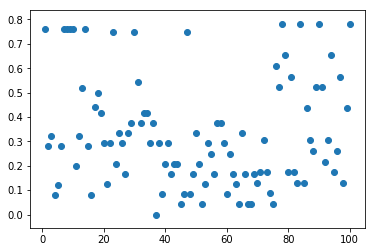

In [69]:
plt.scatter(*zip(*scores_knn_results))
plt.show()

## Plotting scoring results for B method

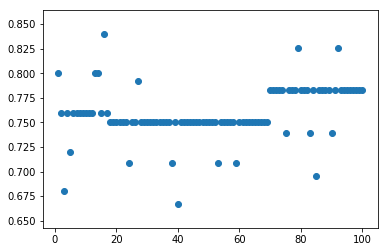

In [71]:
plt.scatter(*zip(*scores_bnb_results))
plt.show()

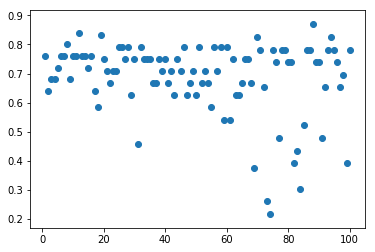

In [72]:
plt.scatter(*zip(*scores_dtc_results))
plt.show()

## Validating

#### We need to check if the new movies will be recommended

In [39]:
accuracy_score(y_validation, bnb.predict(X_validation))

0.4

## Recommendations 

In [40]:
#Shows recommended movies
l = dtc.predict(X_validation)
index = []
rec = X_validation
for i in range(len(l)):
    if(l[i]!=1):
        index.append(i)
rec = rec.drop(rec.index[[index]])
rec

,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
25,129,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
27,134,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
28,135,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [41]:
showMovieTitles(rec)

Apollo 13 (1995)
Beyond Rangoon (1995)
Blue in the Face (1995)
